In [24]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import classification_report

In [16]:
# Load dataset
wine = load_wine()
X, y = wine.data, wine.target
feature_names = wine.feature_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [17]:
# Sequential Forward Selection
# 4-fold cross-validation, select 6 best features
knn = KNeighborsClassifier()
sfs = SFS(knn, k_features=13, forward=True, floating=False,
           verbose=1, scoring='accuracy', cv=4)

In [18]:
# Selection
sfs = sfs.fit(X, y, custom_feature_names=feature_names)
sfs.subsets_

[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.2s finished
Features: 1/13[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.2s finished
Features: 2/13[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s finished
Features: 3/13[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
Features: 4/13[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s finished
Features: 5/13[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s finished
Features: 6/13[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s finished
Features: 7/13[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s finished
Features: 8/13[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
Features: 9/13[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished
Features: 10/13[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
Features: 11/13[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
Feat

{1: {'avg_score': 0.76989664082687337,
  'cv_scores': array([ 0.73333333,  0.73333333,  0.82222222,  0.79069767]),
  'feature_idx': (6,),
  'feature_names': ('flavanoids',)},
 2: {'avg_score': 0.91059431524547807,
  'cv_scores': array([ 0.75555556,  0.95555556,  0.97777778,  0.95348837]),
  'feature_idx': (0, 6),
  'feature_names': ('alcohol', 'flavanoids')},
 3: {'avg_score': 0.92777777777777781,
  'cv_scores': array([ 0.75555556,  0.95555556,  1.        ,  1.        ]),
  'feature_idx': (0, 6, 9),
  'feature_names': ('alcohol', 'flavanoids', 'color_intensity')},
 4: {'avg_score': 0.94444444444444442,
  'cv_scores': array([ 0.8       ,  0.97777778,  1.        ,  1.        ]),
  'feature_idx': (0, 6, 8, 9),
  'feature_names': ('alcohol',
   'flavanoids',
   'proanthocyanins',
   'color_intensity')},
 5: {'avg_score': 0.94444444444444442,
  'cv_scores': array([ 0.8       ,  0.97777778,  1.        ,  1.        ]),
  'feature_idx': (0, 6, 7, 8, 9),
  'feature_names': ('alcohol',
   'flava

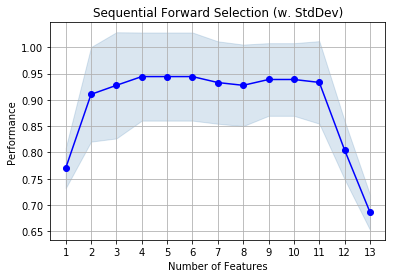

In [19]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.savefig("sample.png",format = 'png', dpi=300)
plt.show()

In [20]:
sfs1 = SFS(knn, k_features=6, forward=True, floating=False,
           verbose=1, scoring='accuracy', cv=4)
sfs1 = sfs1.fit(X, y)
print('Selected features:', sfs1.k_feature_idx_)

[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.2s finished
Features: 1/6[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s finished
Features: 2/6[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.2s finished
Features: 3/6[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
Features: 4/6[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s finished
Features: 5/6[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s finished
Features: 6/6

Selected features: (0, 6, 7, 8, 9, 10)


In [21]:
X_train_sfs = sfs1.transform(X_train)
X_test_sfs = sfs1.transform(X_test)

In [40]:
clf_sfs = tree.DecisionTreeClassifier(random_state=0)
clf_sfs = clf_sfs.fit(X_train_sfs, y_train)
pred_sfs = clf_sfs.predict(X_test_sfs)
print(classification_report(y_test, pred_sfs))

             precision    recall  f1-score   support

          0       0.91      0.91      0.91        22
          1       0.93      0.87      0.90        31
          2       0.90      1.00      0.95        19

avg / total       0.92      0.92      0.92        72



In [41]:
clf0 = tree.DecisionTreeClassifier(random_state=0)
clf0 = clf0.fit(X_train, y_train)
pred_clf0 = clf0.predict(X_test)
print(classification_report(y_test, pred_clf0))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93        22
          1       0.93      0.87      0.90        31
          2       0.90      0.95      0.92        19

avg / total       0.92      0.92      0.92        72

